In [1]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder



In [2]:
import pandas as pd
file_path = 'bank-full.csv'
df = pd.read_csv(file_path)
df = pd.read_csv(file_path, sep=';')  
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [5]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [6]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [8]:
types = df.dtypes.value_counts()
print('Data Types and Frequency in Dataset:')
print(types)

Data Types and Frequency in Dataset:
object    10
int64      7
Name: count, dtype: int64


In [9]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns



# Codificación de variables categóricas
df_dummies = pd.get_dummies(df, columns=catcols, dtype=int, drop_first=True)

# Visualizar el DataFrame con variables dummies
df_dummies


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
X=df_dummies
var_ret=[]
for i in X.columns:
    if X[i].sum() <2260: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
df_dummies.drop(columns=var_ret, inplace=True)


print(var_ret)


df_dummies.head()

['job_entrepreneur', 'job_housemaid', 'job_self-employed', 'job_student', 'job_unemployed', 'job_unknown', 'education_unknown', 'default_yes', 'month_dec', 'month_jan', 'month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success']


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


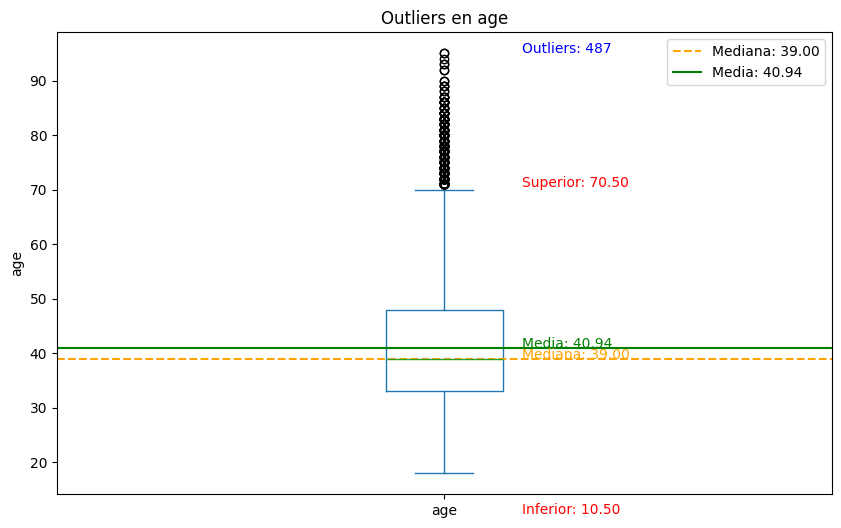

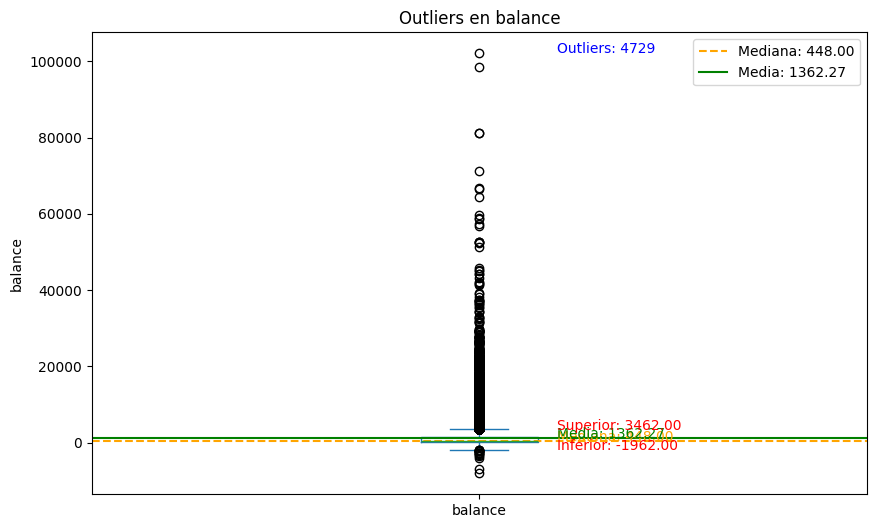

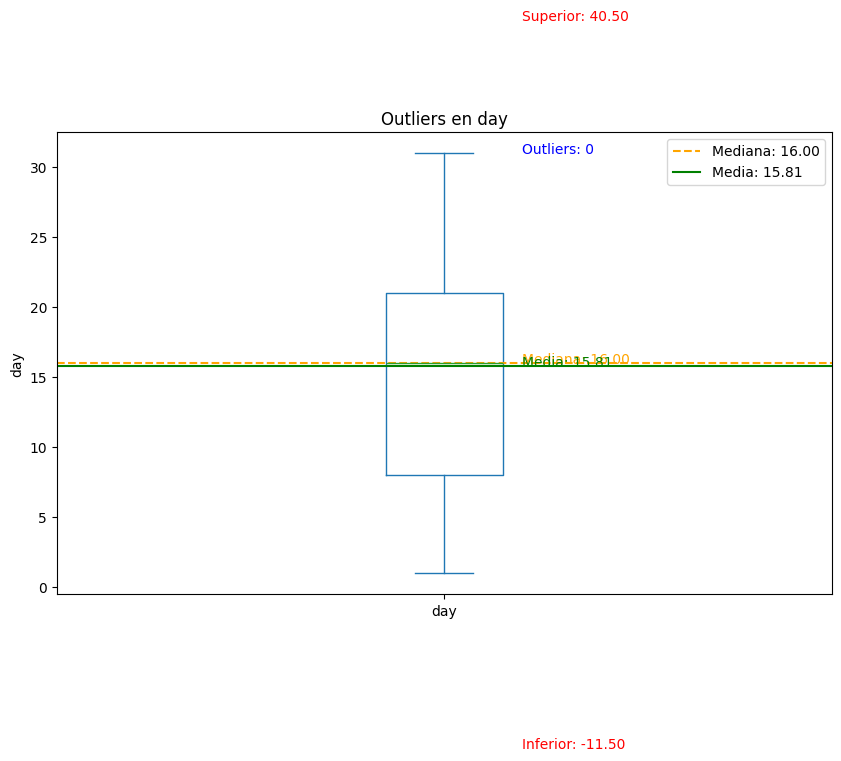

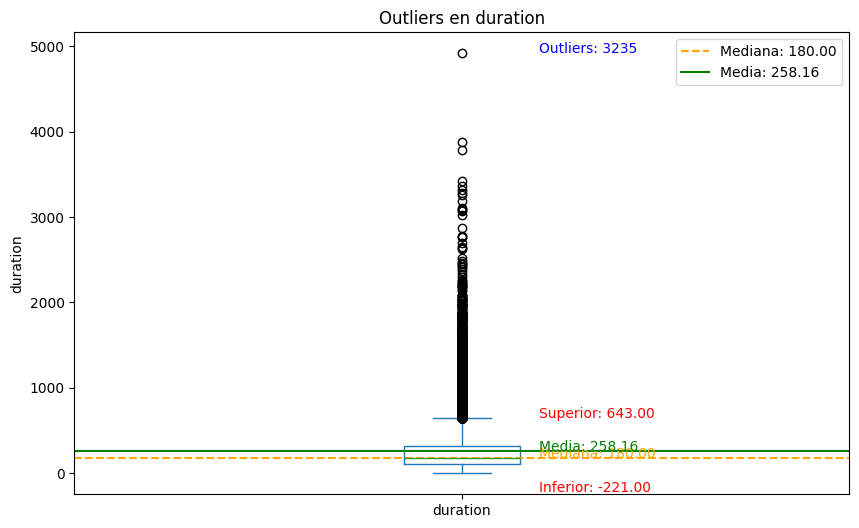

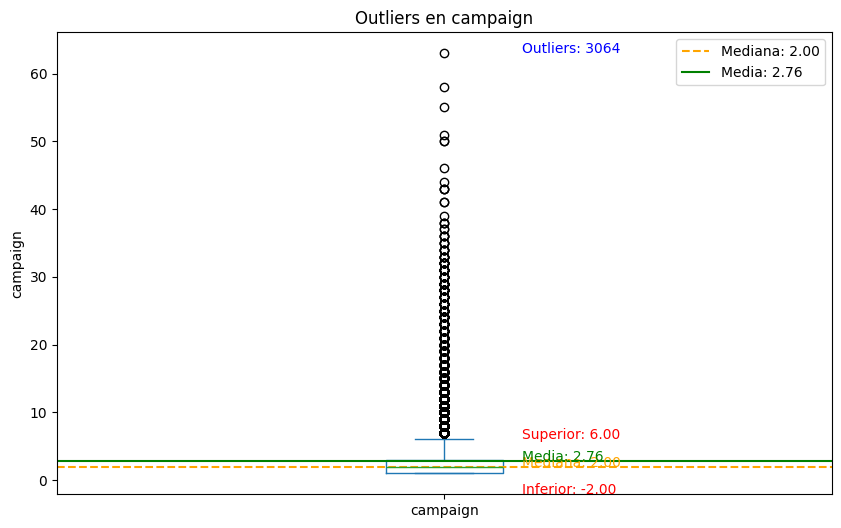

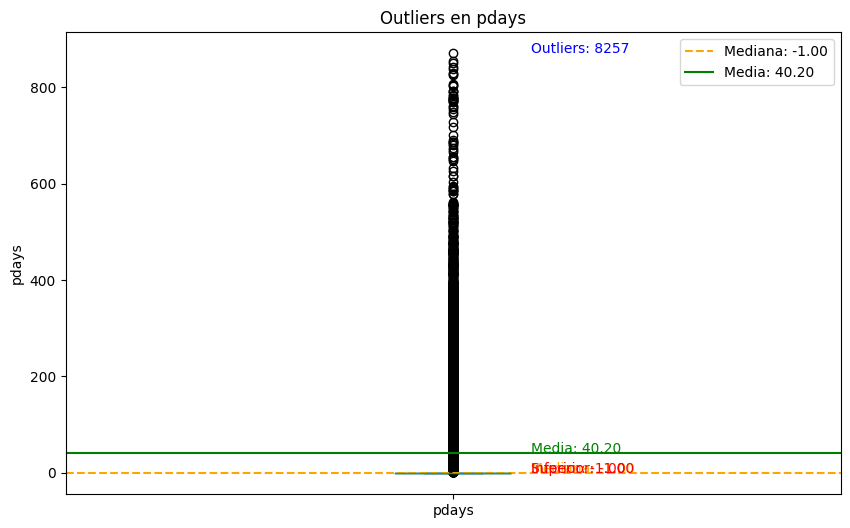

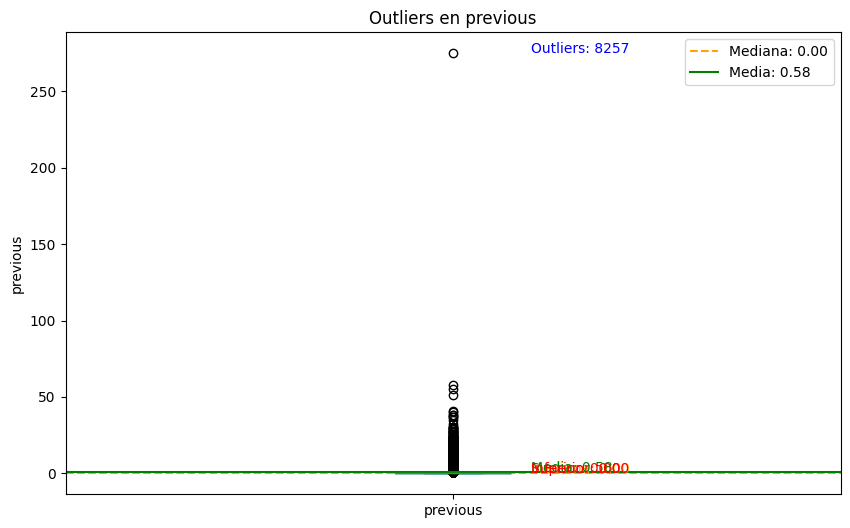

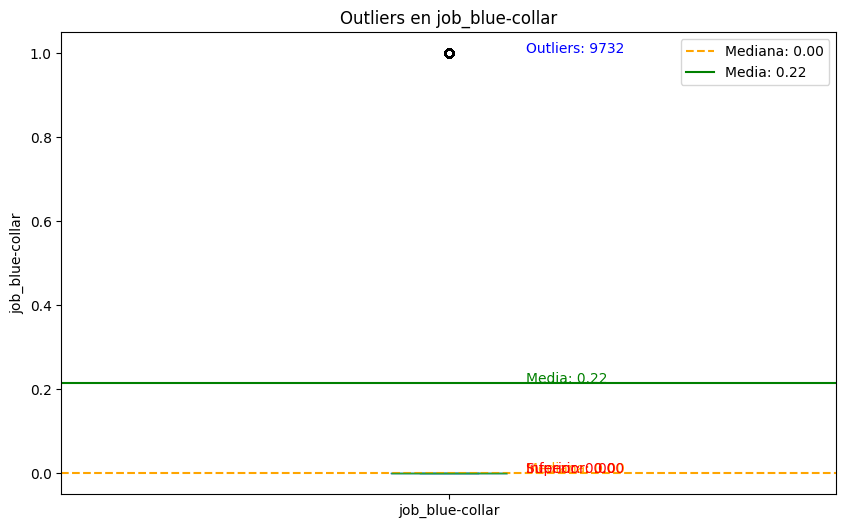

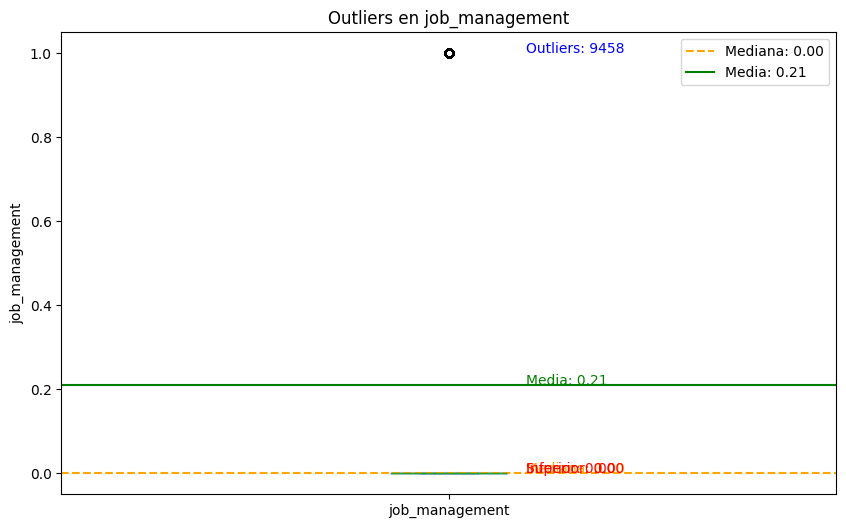

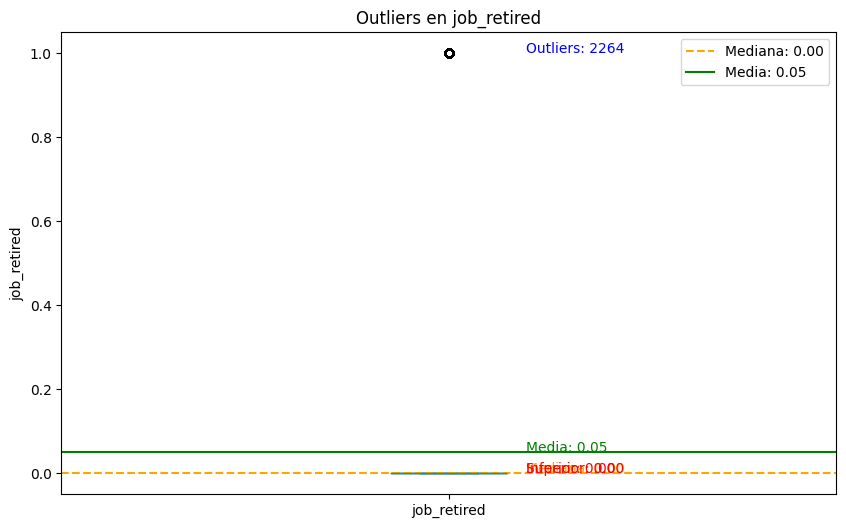

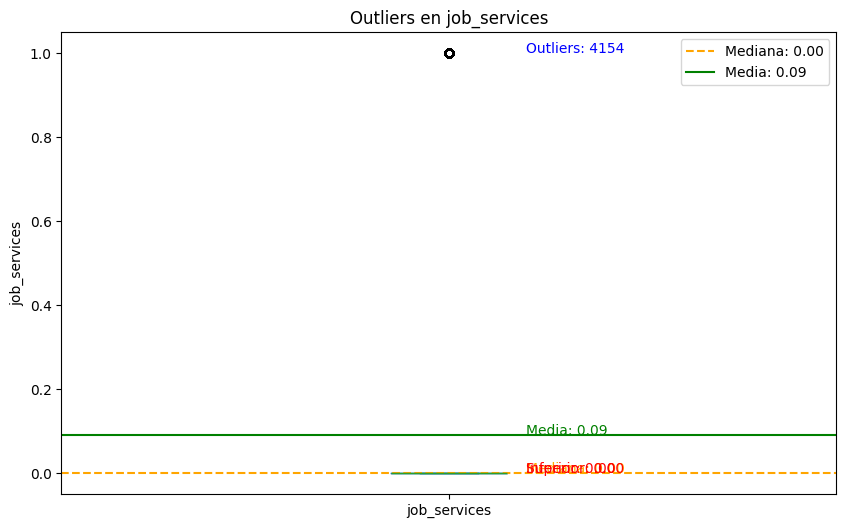

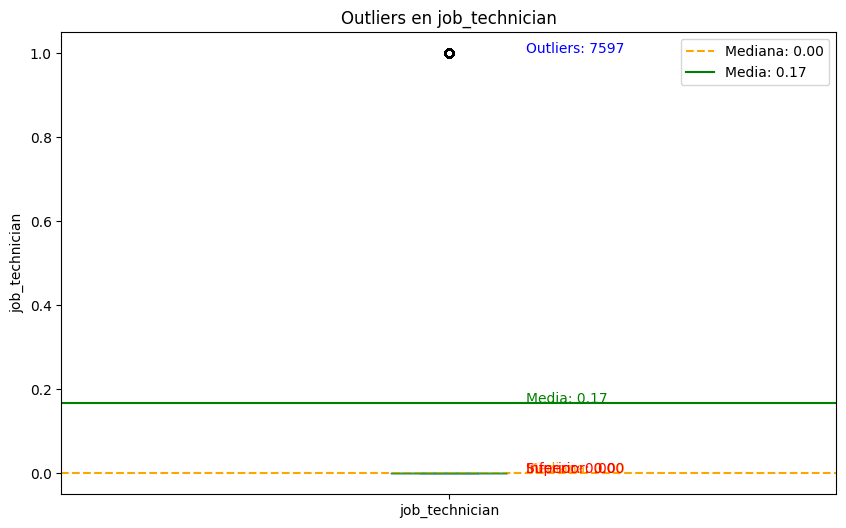

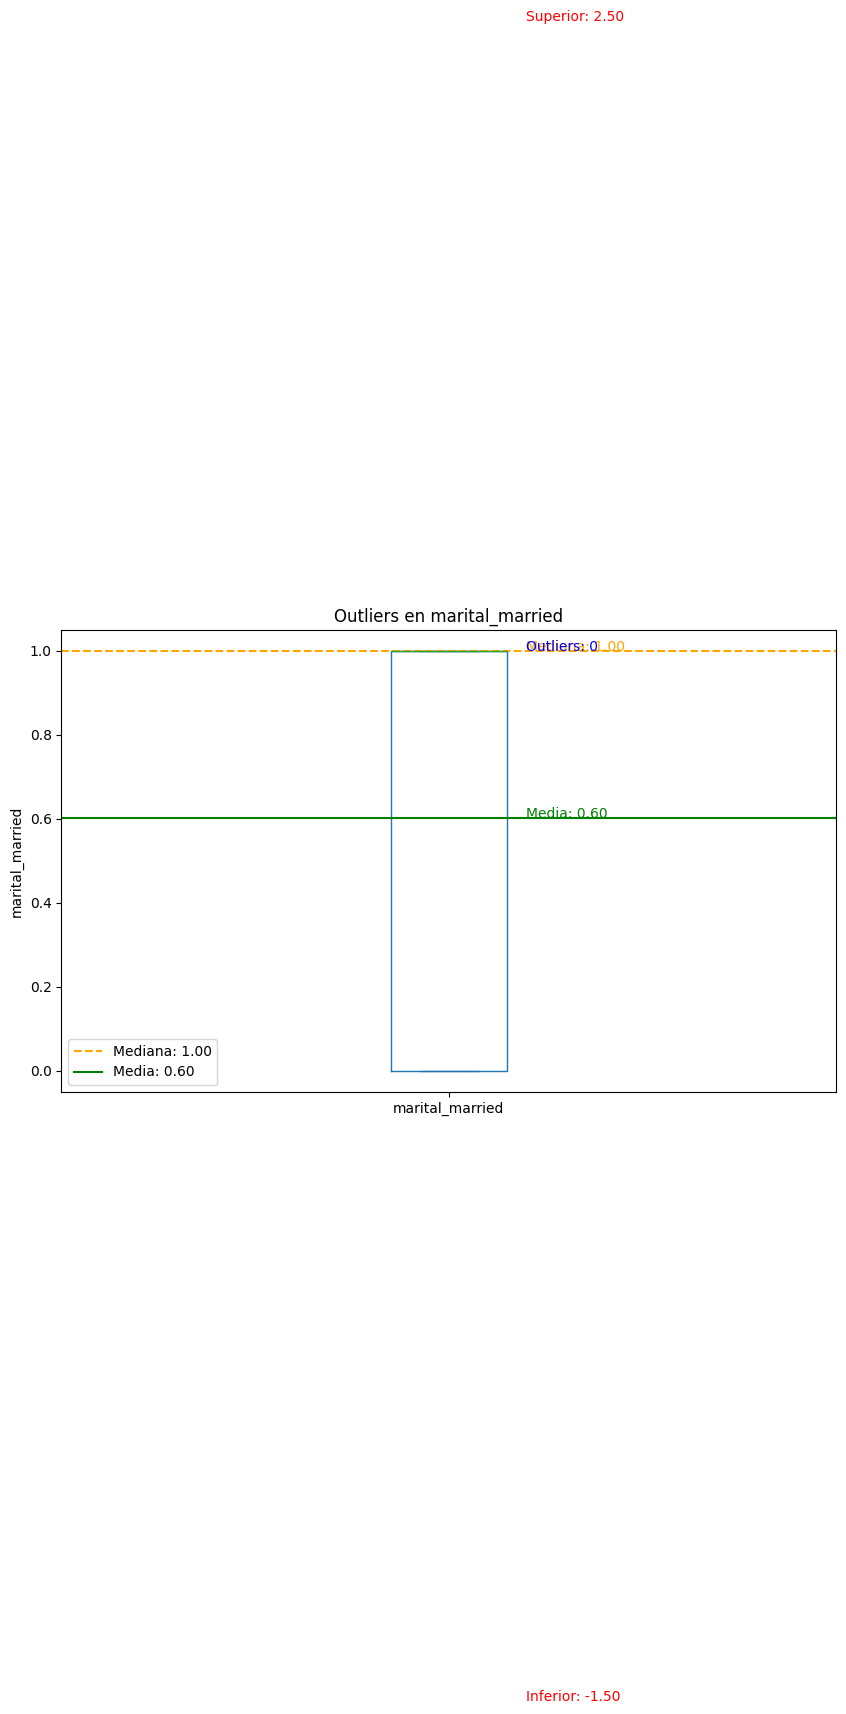

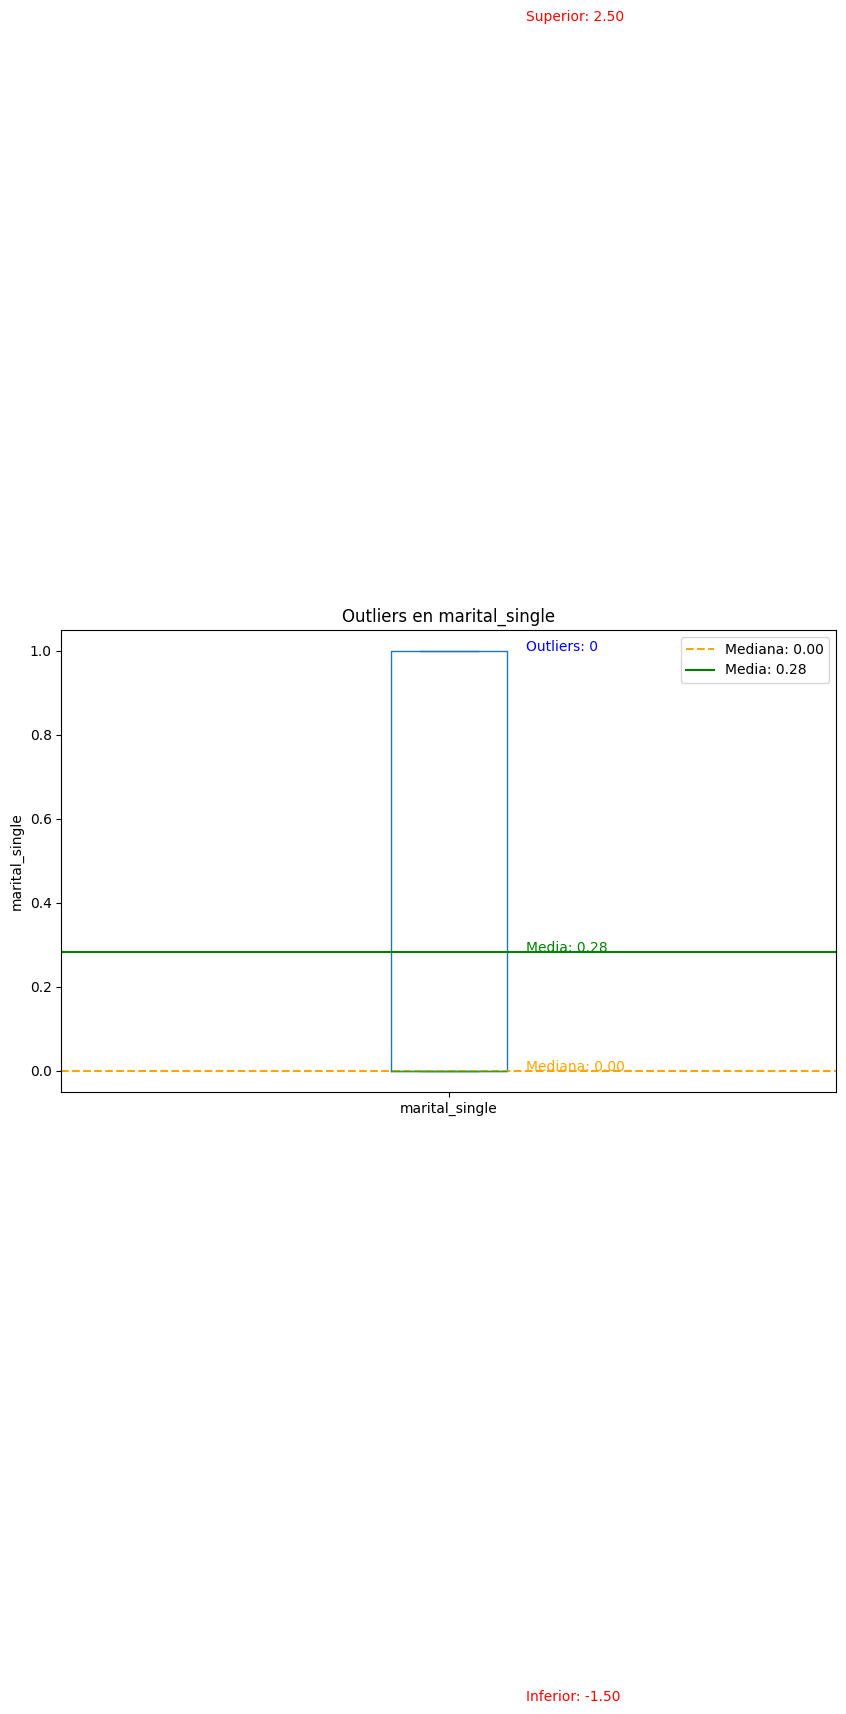

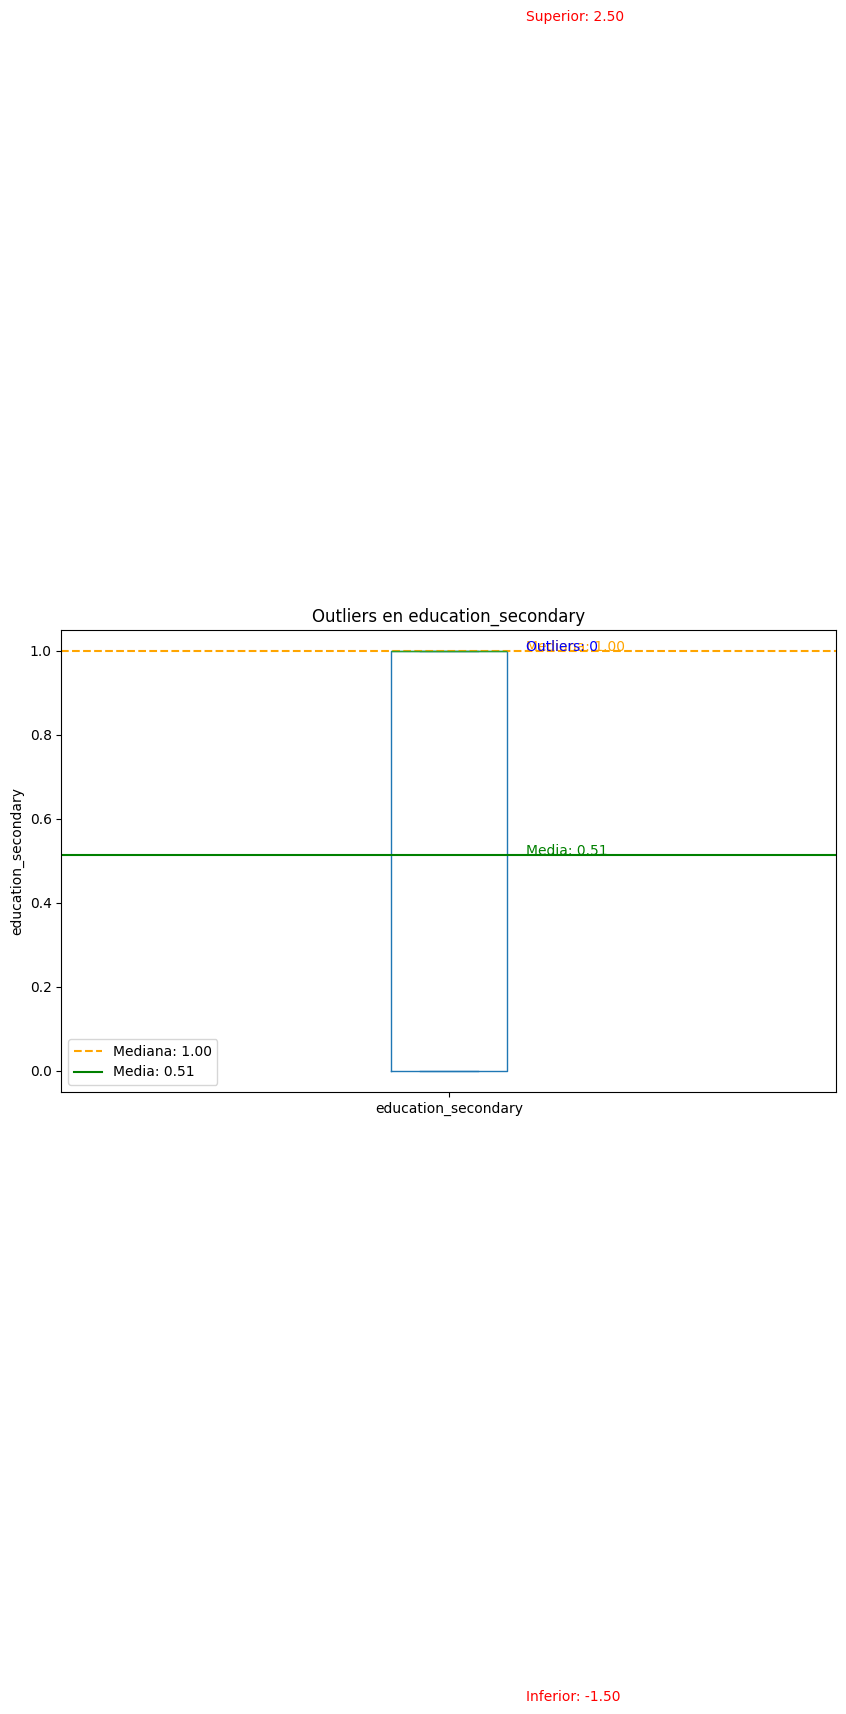

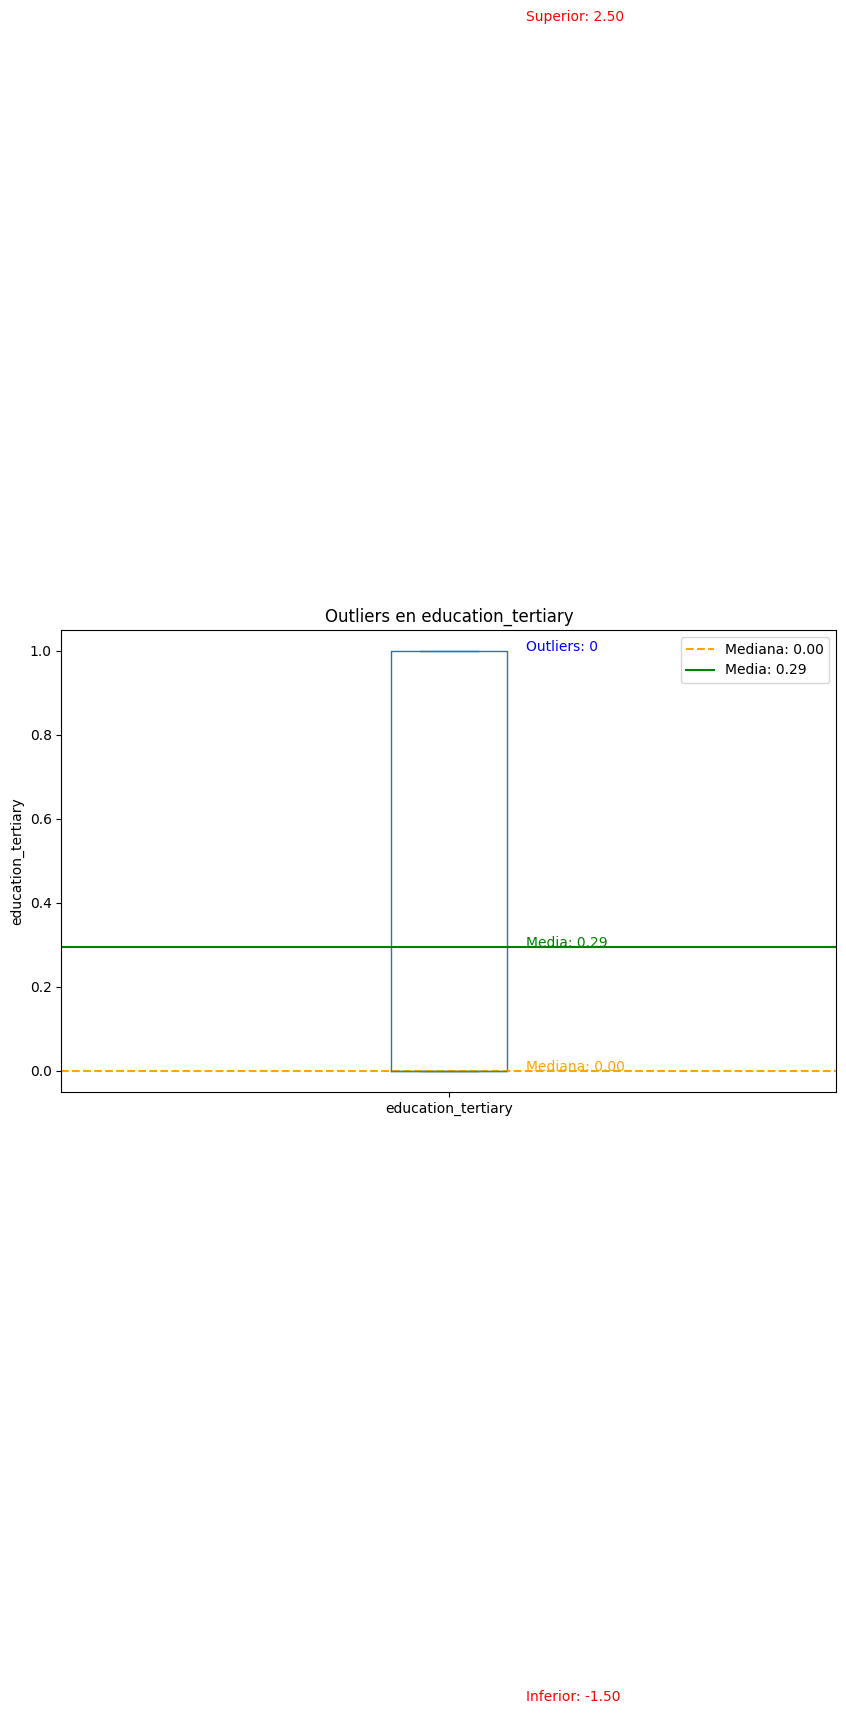

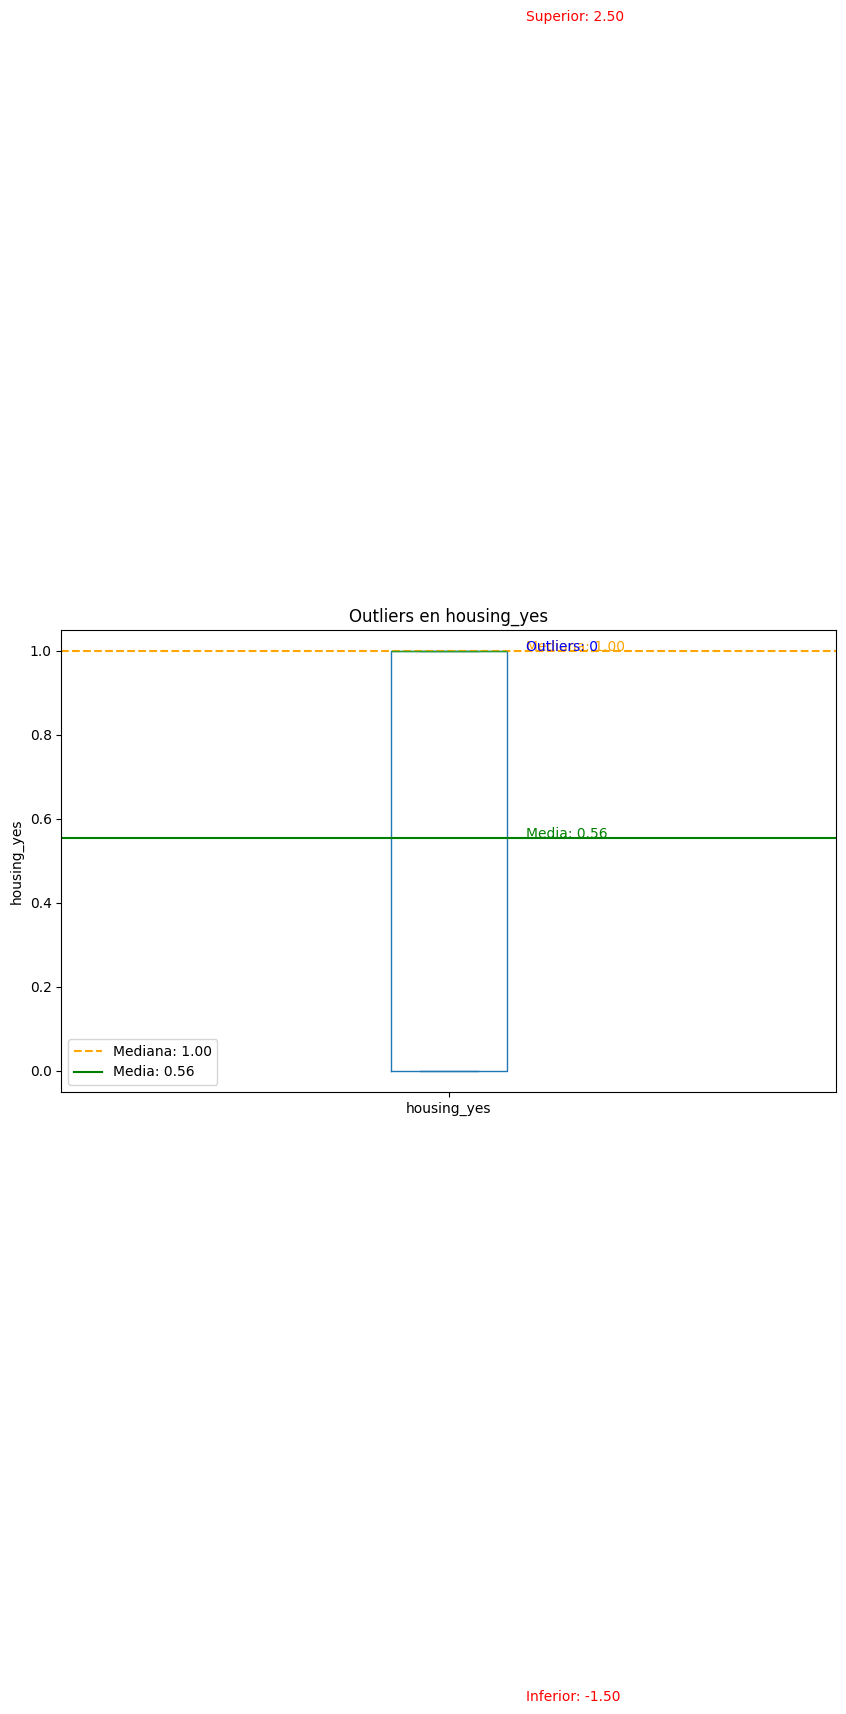

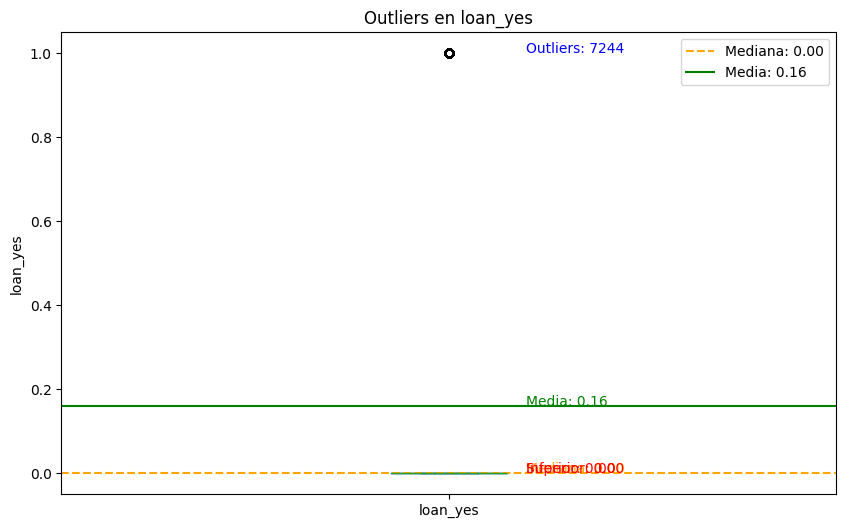

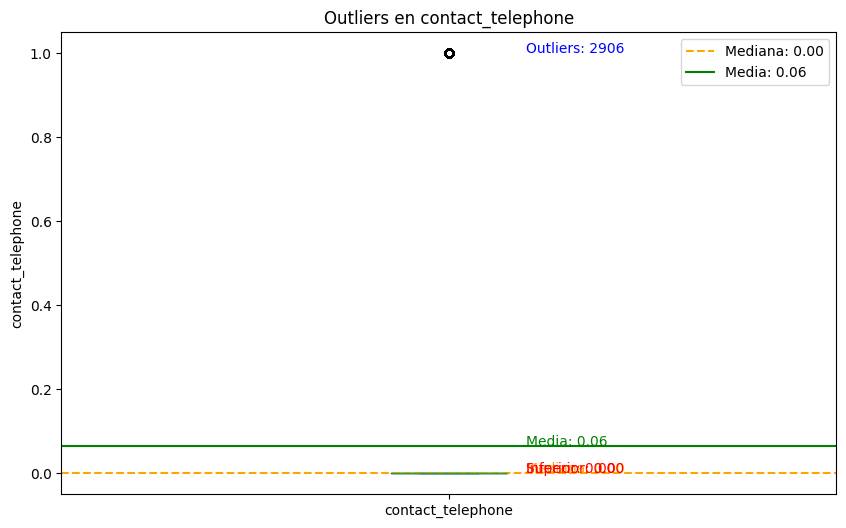

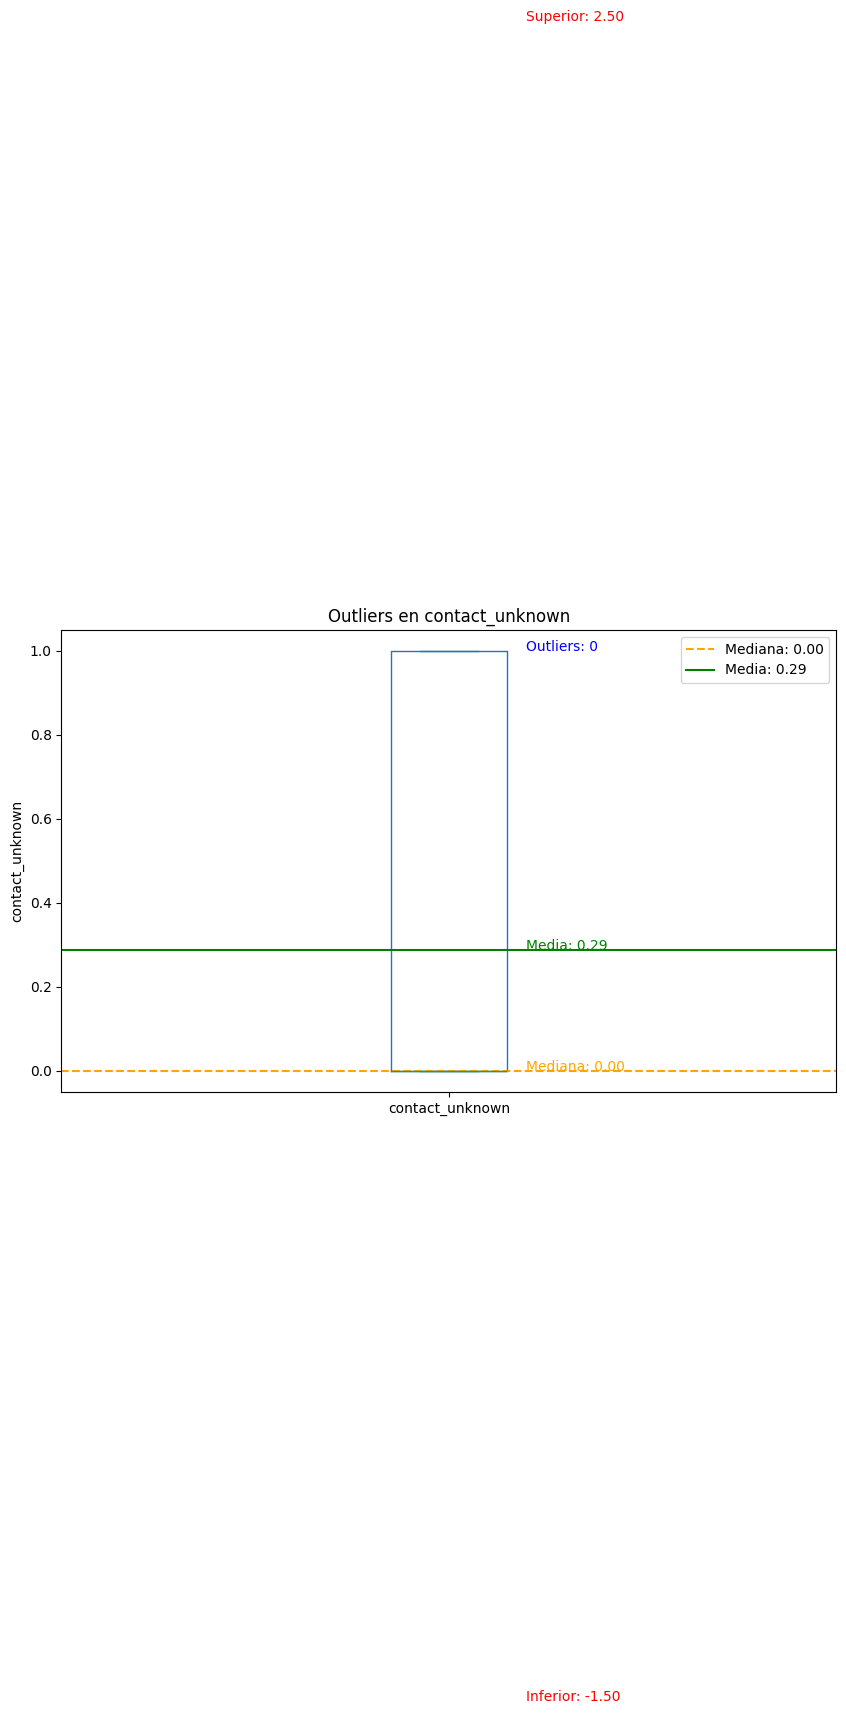

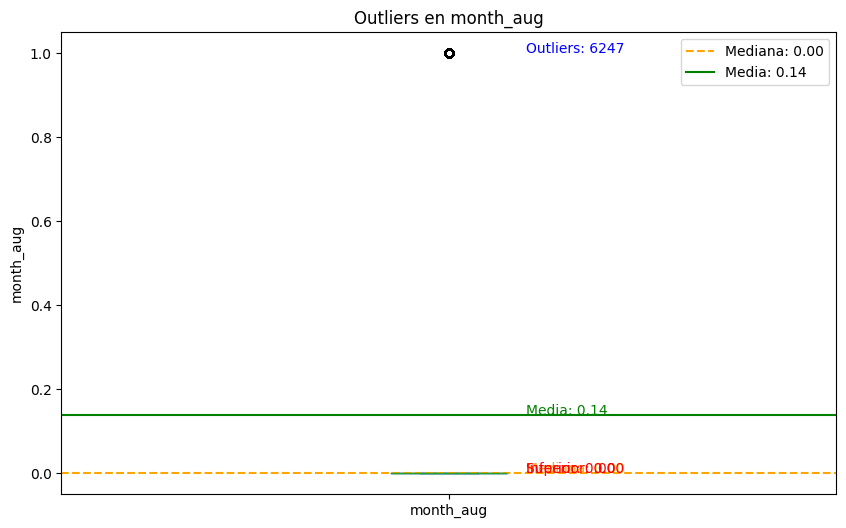

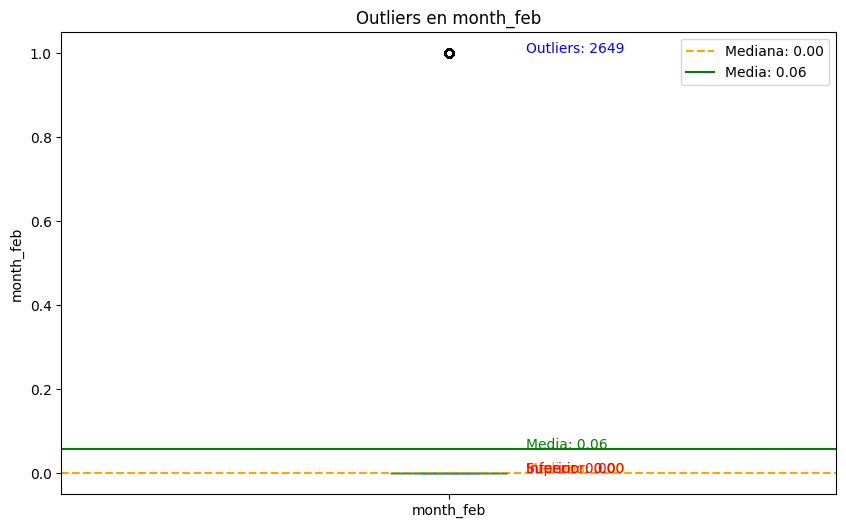

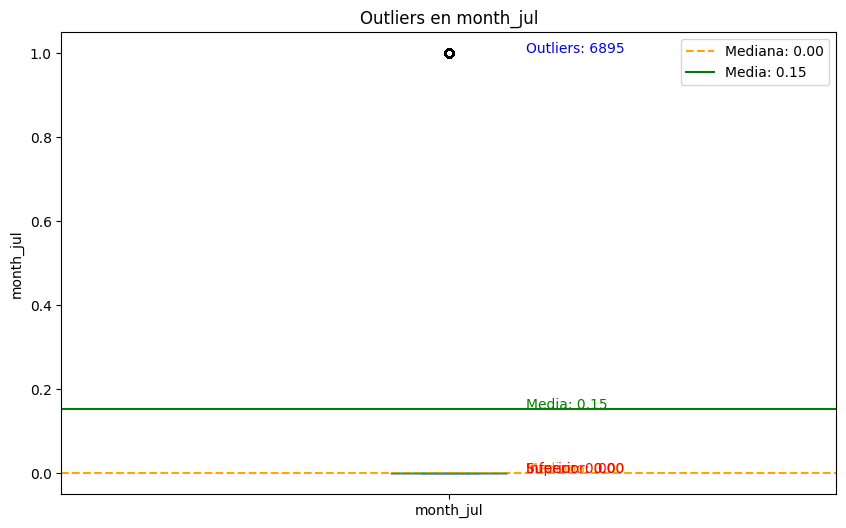

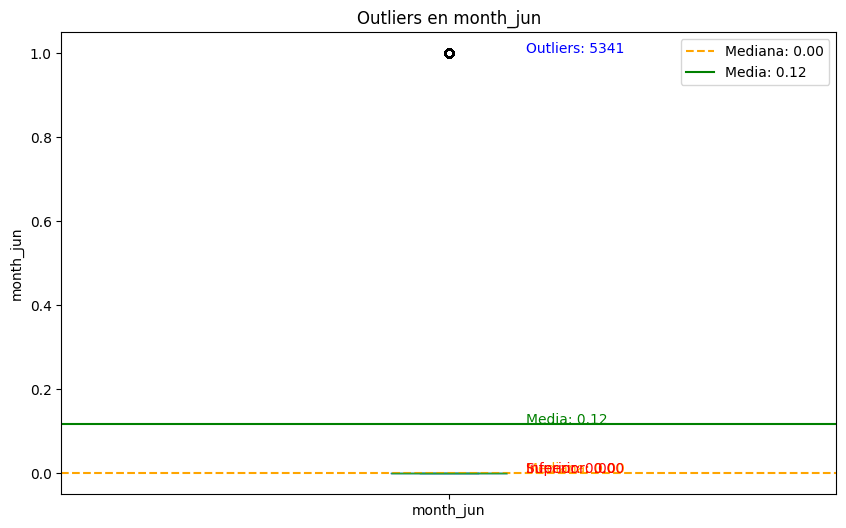

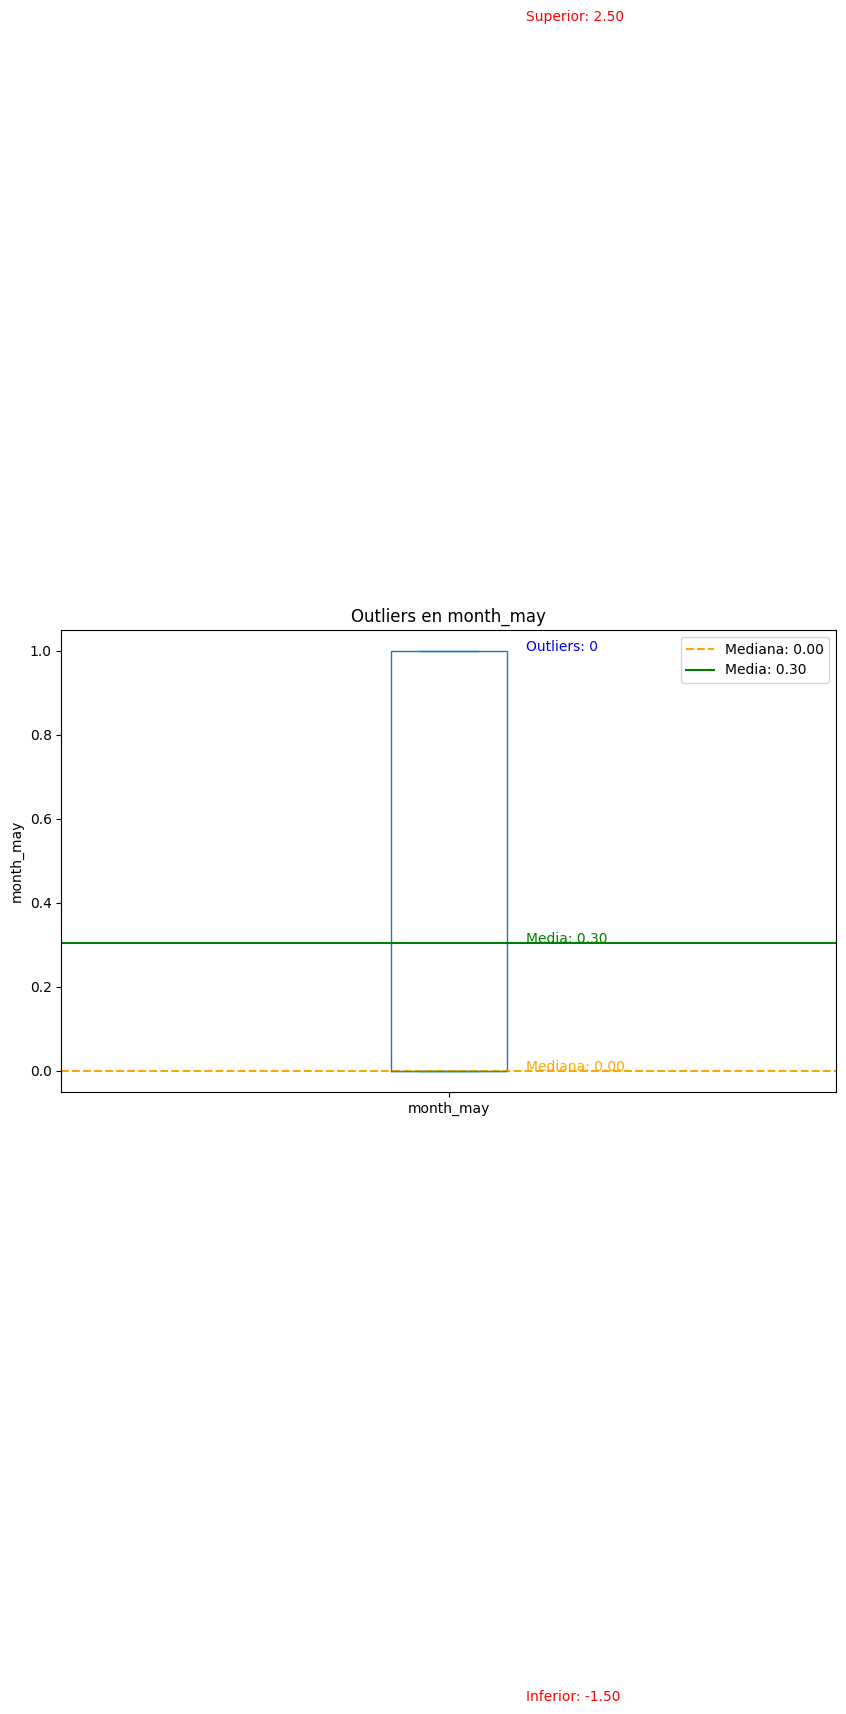

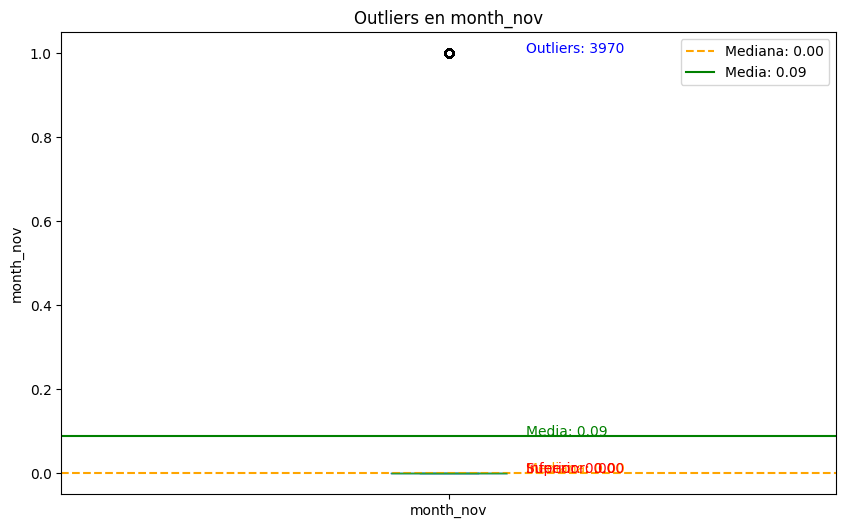

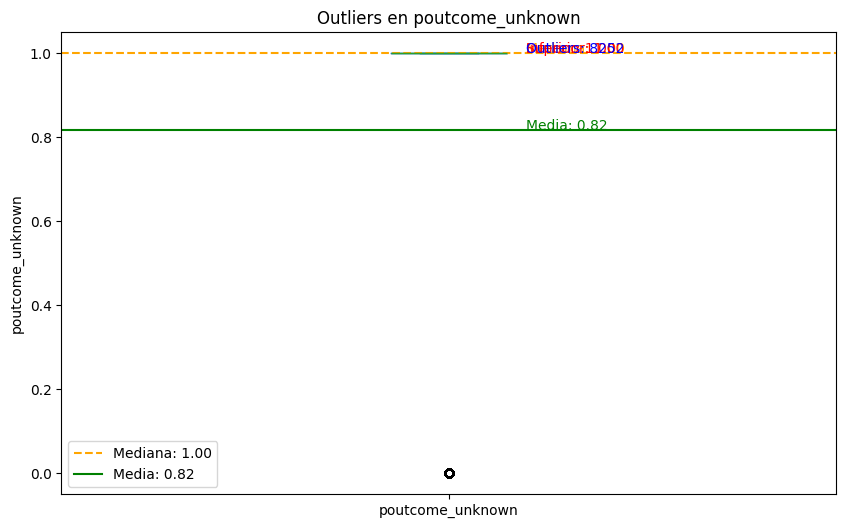

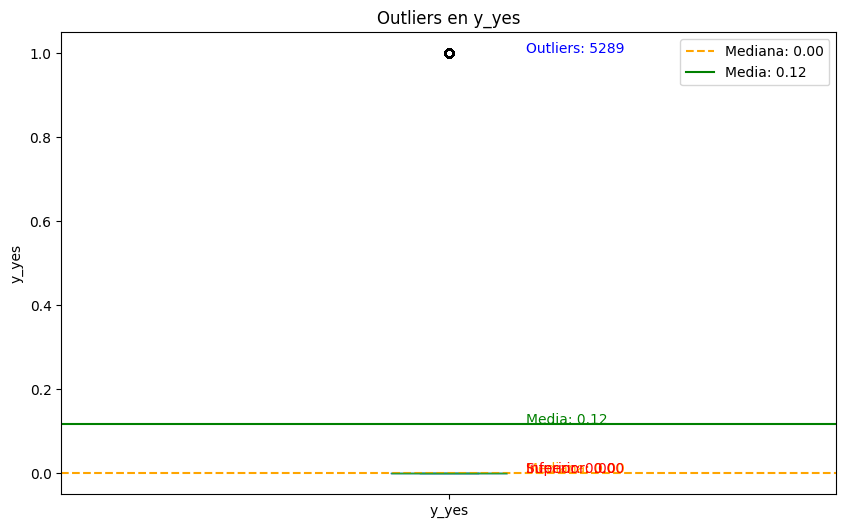

{'age': (10.5, 70.5, np.int64(487)), 'balance': (-1962.0, 3462.0, np.int64(4729)), 'day': (-11.5, 40.5, np.int64(0)), 'duration': (-221.0, 643.0, np.int64(3235)), 'campaign': (-2.0, 6.0, np.int64(3064)), 'pdays': (-1.0, -1.0, np.int64(8257)), 'previous': (0.0, 0.0, np.int64(8257)), 'job_blue-collar': (0.0, 0.0, np.int64(9732)), 'job_management': (0.0, 0.0, np.int64(9458)), 'job_retired': (0.0, 0.0, np.int64(2264)), 'job_services': (0.0, 0.0, np.int64(4154)), 'job_technician': (0.0, 0.0, np.int64(7597)), 'marital_married': (-1.5, 2.5, np.int64(0)), 'marital_single': (-1.5, 2.5, np.int64(0)), 'education_secondary': (-1.5, 2.5, np.int64(0)), 'education_tertiary': (-1.5, 2.5, np.int64(0)), 'housing_yes': (-1.5, 2.5, np.int64(0)), 'loan_yes': (0.0, 0.0, np.int64(7244)), 'contact_telephone': (0.0, 0.0, np.int64(2906)), 'contact_unknown': (-1.5, 2.5, np.int64(0)), 'month_aug': (0.0, 0.0, np.int64(6247)), 'month_feb': (0.0, 0.0, np.int64(2649)), 'month_jul': (0.0, 0.0, np.int64(6895)), 'month_

In [11]:
outliers = {}
X=df_dummies

for i in X.columns:
    plt.figure(figsize=(10, 6))
    ax = X[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de la mediana y la media
    median = X[i].median()
    mean = X[i].mean()
    
    # Límites de los cuartiles
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = X[(X[i] < inf) | (X[i] > sup)][i].count()

    # Agregar la información al diccionario de outliers
    outliers[i] = (float(inf), float(sup), outliers_count)

    # Anotaciones en el plot
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(X[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

In [12]:
df_dummies

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
45207,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
45208,72,5715,17,1127,5,184,3,0,0,1,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [15]:
eliminar = []  

columnas_eliminar=["balance", "duration","campaign","age"] 

for i in X[columnas_eliminar].columns:
    for j in range(X.shape[0]):
        inf, sup, z = outliers[i]
        if X.loc[j, i] < inf or X.loc[j,i] > sup : 
            eliminar.append(j)

eliminar=list(set(eliminar))
print(eliminar)

X_cleaned1 = X.drop(index=eliminar)

print(f"Filas eliminadas: {len(eliminar)}")
print(X_cleaned1.shape)
print(X_cleaned1)


[32776, 32782, 32791, 32793, 32797, 32801, 34, 32802, 37, 32806, 32809, 32810, 43, 32817, 32819, 53, 32824, 59, 32827, 61, 65, 32835, 69, 70, 32840, 32842, 32847, 83, 86, 32855, 87, 32858, 32865, 109, 32892, 32897, 130, 32899, 32905, 152, 32929, 32932, 168, 170, 32940, 32941, 32944, 179, 181, 182, 32953, 186, 187, 32954, 32959, 32966, 32967, 32971, 205, 32974, 32976, 32977, 32983, 32986, 32991, 224, 32995, 231, 232, 33005, 33007, 241, 249, 33018, 33019, 33017, 33024, 33033, 33035, 33037, 271, 33045, 33047, 33048, 33051, 33054, 33055, 291, 33059, 33061, 33068, 33075, 33078, 33080, 33082, 33084, 33087, 33089, 33090, 330, 33100, 334, 33105, 33114, 347, 33115, 351, 33136, 372, 382, 33152, 33153, 388, 390, 391, 33159, 394, 33163, 33166, 33167, 33173, 411, 33185, 33195, 428, 33197, 430, 431, 33203, 446, 33214, 33216, 33220, 33229, 467, 471, 474, 33243, 33245, 33252, 493, 33267, 33270, 33271, 510, 512, 33286, 533, 33306, 33312, 33329, 565, 33335, 569, 33338, 33340, 33347, 33358, 592, 33360, 3

In [24]:
X_cleaned1 = X_cleaned1.reset_index(drop=True)
X_cleaned1

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34714,34,557,17,224,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
34715,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
34716,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
34717,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [27]:
eliminarprev = []  

columnas_eliminar=["previous"] 

for i in X_cleaned1[columnas_eliminar]:
    for j in range(X_cleaned1.shape[0]):
        if X_cleaned1.loc[j, i] > 10: 
            eliminarprev.append(j)

eliminarprev=list(set(eliminarprev))
print(eliminarprev)

X_cleaned1 = X_cleaned1.drop(index=eliminarprev)

print(f"Filas eliminadas: {len(eliminarprev)}")
print(X_cleaned1.shape)
print(X_cleaned1)

[20488, 22540, 28686, 28176, 28179, 28183, 30235, 30237, 23585, 24610, 33314, 28710, 24104, 33832, 30251, 25133, 28720, 32304, 30258, 22581, 25654, 24123, 25153, 24130, 29249, 28228, 26695, 27720, 27722, 33868, 21069, 32847, 23637, 24150, 22616, 21593, 27233, 18530, 25702, 26727, 20074, 24689, 21619, 23155, 27764, 28276, 25207, 22648, 20088, 29299, 31865, 33911, 34421, 25726, 25727, 30846, 34424, 34428, 26755, 29317, 24198, 30346, 26253, 31374, 34445, 21136, 26769, 24210, 33430, 30366, 22691, 34467, 26277, 24230, 26790, 33446, 26281, 21675, 34479, 21680, 21682, 21175, 29371, 34496, 22209, 28868, 31943, 31949, 25807, 29392, 29393, 21202, 34001, 29397, 34519, 28376, 28377, 29916, 32988, 34526, 33504, 27363, 34532, 32997, 29930, 20721, 34035, 34547, 23287, 22779, 28927, 30975, 20228, 29960, 34056, 34568, 30990, 31502, 21265, 20243, 34581, 28438, 29462, 34072, 27418, 22308, 33062, 18730, 29994, 31020, 24881, 26929, 24883, 27953, 28978, 28472, 27962, 28992, 23362, 23364, 21317, 18762, 30028

In [ ]:
import matplotlib.pyplot as plt

# Itera sobre cada columna de X_cleaned1
for i in X_cleaned1.columns:
    plt.figure(figsize=(10, 6))
    
    # Gráfico de caja para la columna actual
    ax = X_cleaned1[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de estadísticas
    median = X_cleaned1[i].median()
    mean = X_cleaned1[i].mean()
    Q1 = X_cleaned1[i].quantile(0.25)
    Q3 = X_cleaned1[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = X_cleaned1[(X_cleaned1[i] < inf) | (X_cleaned1[i] > sup)][i].count()

    # Anotaciones en el gráfico
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(X_cleaned1[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

In [49]:
#X_cleaned1.to_excel("fff.xlsx",index=False)

MODELO 1: VARIABLE DE RESPUESTA PRODUCTIVIDAD ACTUAL

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

X= X_cleaned1.drop(columns='y_yes')
# Separar variables predictoras (X) y la variable objetivo (y)
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [ ]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

In [ ]:

# usar MSE - error cuadrático medio
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
mse_scores = - scores
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_absolute_error')

mae_scores = -scores

#print("MAE scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

rmse_scores = np.sqrt(mse_scores)

print("Mean RMSE:", rmse_scores.mean())

print("Mean MSE:", mse_scores.mean())

MODELO 1: OLS VARIABLE DE RESPUESTA PRODUCTIVIDAD ACTUAL

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


y = X_cleaned1['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión usando mínimos cuadrados ordinarios (OLS)
md = sm.OLS(y_train, X_train).fit()

# Resumen de resultados
print(md.summary())

# Extraer coeficientes y p-valores en un DataFrame
results = pd.DataFrame({
    'Variable': md.params.index,
    'Coeficiente': md.params.values,
    'p-valor': md.pvalues.values
})
# Filtrar variables significativas (usualmente p-valor < 0.01)
significativas = results[results['p-valor'] < 0.1]
no_significativas = results[results['p-valor'] >= 0.1]

# Mostrar resultados
print("Variables Significativas (p-valor < 1%):")
print(significativas)

print("\nVariables No Significativas (p-valor >= 1%):")
print(no_significativas)


MODELO 1: OLS SOLO CON VARIABLES SIGNIFICATIVAS

In [ ]:
X_significativas = X_cleaned1[significativas['Variable'].values[1:]]  # [1:] para excluir 'const'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_significativas, X_test_significativas, y_train_significativas, y_test_significativas = train_test_split(X_significativas, y, random_state=1)

# Agregar la constante para el modelo OLS
X_train_significativas = sm.add_constant(X_train_significativas)
X_test_significativas = sm.add_constant(X_test_significativas)

# Ajustar el modelo OLS
md_significativas = sm.OLS(y_train_significativas, X_train_significativas).fit()

# Realizar predicciones sobre el conjunto de prueba
y_pred_significativas = md_significativas.predict(X_test_significativas)

# Calcular MAE, MSE y RMSE
mae = mean_absolute_error(y_test_significativas, y_pred_significativas)
mse = mean_squared_error(y_test_significativas, y_pred_significativas)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(md_significativas.summary())


Modelo Redes neuronales

In [ ]:
train = X_cleaned1.sample(frac=0.8, random_state=100)
train.head()


In [ ]:
test = X_cleaned1.drop(train.index)
test.head()

In [ ]:
print(train.shape)
print(test.shape)

In [58]:
sys.setrecursionlimit(999)

In [ ]:
X_cleaned1.columns

In [ ]:
X_cleaned1.dtypes

In [ ]:
# Definir las columnas categóricas y continuas
categorical_features = []

# Encontrar las columnas dummificadas
for col in X_cleaned1.columns:
    if "_" in col and col != "y_yes":  
        categorical_features.append(col)


continuous_features = [col for col in X_cleaned1.columns if col not in categorical_features and col != "y_yes"]

# Mostrar las listas
print("Categorical dummies:", categorical_features)
print("Continuous features:", continuous_features)


In [62]:

X = X_cleaned1.drop(columns=['y_yes'])

# Definir la variable objetivo
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_X))



In [63]:
# Iniciar el cronómetro
start_time = time.time()

# Definir el modelo de red neuronal profunda con capas densas y Dropout
linear_model_1 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Capa de salida para regresión
])

# Compilar el modelo
linear_model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mae', 'mse']
)

# Entrenamiento del modelo
history_1 = linear_model_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

# Medir el tiempo de entrenamiento
elapsed_time_1 = time.time() - start_time

In [ ]:
# Graficar las métricas y la pérdida en subgráficas
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Pérdida (Loss)
axs[0].plot(history_1.history['loss'], label='Pérdida de Entrenamiento', color='blue')
axs[0].plot(history_1.history['val_loss'], label='Pérdida de Validación', color='orange', linestyle='--')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Pérdida (MAE)')
axs[0].set_title(f'Modelo 1 - Pérdida (Tiempo: {elapsed_time_1:.2f} segundos)')
axs[0].legend()
axs[0].grid(True)

# Error Cuadrático Medio (MSE)
axs[1].plot(history_1.history['mse'], label='MSE de Entrenamiento', color='green')
axs[1].plot(history_1.history['val_mse'], label='MSE de Validación', color='red', linestyle='--')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('MSE')
axs[1].set_title('Error Cuadrático Medio (MSE)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Tiempo de entrenamiento del Modelo 1: {elapsed_time_1:.2f} segundos")